In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
X, y = mnist['data'], mnist['target']

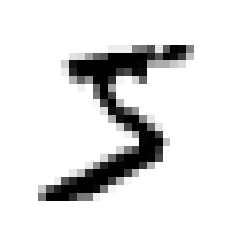

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis('off')
plt.show()

In [8]:
y[0]

'5'

tenemos que cambiar los objetivos de string a numero

In [10]:
import numpy as np
import pandas as pd

y = y.astype(np.int8)
y[0]

5

In [11]:
X.shape

(70000, 784)

Sabemos que este data set ya no trae dividido el train del test, los primeros 60k de instancias son para el train, las ultimas 10k son para el train

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[:-10000], y[:60000], y[:-10000]

In [15]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score, roc_curve, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier

kng_cla = KNeighborsClassifier()
kng_cla.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
y_knn_pred = kng_cla.predict(X_train)

In [18]:
TPR = precision_score(y_train, y_knn_pred)
TPR

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_knn_pred)
accuracy

In [ ]:
from scipy.ndimage.interpolation import shift

In [ ]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [ ]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [ ]:
X_train_augmented.shape()